In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [2]:
with open('PLmatches.csv', 'r') as open_file:
    df = pd.read_csv(open_file, index_col=0)

In [17]:
df2 = df[df['match_stadium'] == 'Anfield, Liverpool'].loc[:,['mean_attendance_delta_normalized', 'home_prior_leaguerank', 'away_prior_leaguerank',
            'home_last3_goals', 'away_last3_goals', 'home_last3_poss', 'away_last3_poss', 'away_distance']]

In [18]:
df2.dropna(how='any', inplace=True)

In [19]:
y = df2['mean_attendance_delta_normalized']
X = df2.iloc[:,1:]

In [20]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [21]:
model = sm.OLS(y, X_scaled)

In [22]:
res = model.fit()

In [23]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     mean_attendance_delta_normalized   R-squared:                       0.020
Model:                                          OLS   Adj. R-squared:                 -0.015
Method:                               Least Squares   F-statistic:                    0.5716
Date:                              Thu, 19 Jul 2018   Prob (F-statistic):              0.778
Time:                                      16:42:59   Log-Likelihood:                -281.74
No. Observations:                               200   AIC:                             577.5
Df Residuals:                                   193   BIC:                             600.6
Df Model:                                         7                                         
Covariance Type:                          nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0304      0.080     -0.380      0.704      -0.188       0.127
x2            -0.1222      0.089     -1.373      0.171      -0.298       0.053
x3             0.0165      0.079      0.208      0.836      -0.140       0.173
x4            -0.1122      0.082     -1.366      0.174      -0.274       0.050
x5            -0.0771      0.073     -1.057      0.292      -0.221       0.067
x6            -0.0163      0.082     -0.199      0.843      -0.178       0.146
x7             0.0369      0.074      0.502      0.616      -0.108       0.182
==============================================================================
Omnibus:                       82.780   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.476
Skew:                          -1.834   Prob(JB):                     1.09e-49
Kurtosis:                       6.688   Cond. No.                         2.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4558 entries, 5567 to 22721
Data columns (total 56 columns):
hometeam_name                       4558 non-null object
awayteam_name                       4558 non-null object
home_goals                          4558 non-null int64
away_goals                          4558 non-null int64
match_date                          4558 non-null object
match_timestamp                     4558 non-null int64
match_referee                       4558 non-null object
match_stadium                       4558 non-null object
match_attendance                    4012 non-null float64
home_possession                     4558 non-null float64
away_possession                     4558 non-null float64
home_shotsontarget                  4558 non-null int64
away_shotsontarget                  4558 non-null int64
home_shots                          4558 non-null int64
away_shots                          4558 non-null int64
home_touches                        45

In [38]:
import matplotlib.pyplot as plt

(array([  25.,   33.,  111.,  280.,  554.,  764., 1561.,  597.,   70.,
          12.]),
 array([-4.12997937, -3.42102328, -2.7120672 , -2.00311112, -1.29415503,
        -0.58519895,  0.12375714,  0.83271322,  1.54166931,  2.25062539,
         2.95958147]),
 <a list of 10 Patch objects>)

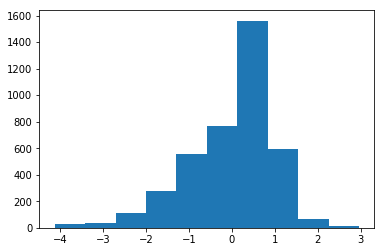

In [96]:
plt.hist(df['mean_attendance_delta_normalized'].dropna())

In [52]:
df[df['match_stadium'] == 'Anfield, Liverpool']['mean_attendance_delta_normalized'].dropna().sort_values()

22715   -4.128557
14073   -4.109259
5903    -3.394472
7053    -3.083302
7823    -3.036367
7278    -2.964804
9908    -2.930328
7836    -2.586080
12482   -2.461498
9259    -2.281279
8070    -2.271309
7909    -2.118618
12478   -2.000673
9452    -1.939157
6637    -1.805521
9665    -1.706928
6507    -1.541942
6997    -1.520388
7245    -1.494830
5709    -1.441337
9535    -1.290001
9364    -1.140870
5776    -1.115814
12389   -1.100129
6872    -1.042980
7330    -1.025350
8005    -0.975616
7929    -0.949440
9853    -0.945189
7320    -0.940644
           ...   
7417     0.764670
7371     0.772261
6828     0.775945
7404     0.781451
7305     0.789043
6800     0.790267
9545     0.797824
7890     0.799964
7454     0.828199
12272    0.834632
7434     0.840186
7882     0.843590
9334     0.850459
6942     0.866653
6722     0.867846
9732     0.878369
9618     0.889911
7071     0.901861
6766     0.912006
12212    0.919058
12356    0.947200
9372     0.964500
5587     1.007729
8218     1.057357
12176    1